In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder , PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [3]:
file_path = "E:\\D_S_project\\practice\\linear_regresion\\data\\raw\\Salary Data.csv"
df = pd.read_csv(file_path)

In [4]:
sal_data = df.copy()

In [5]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
sal_data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
sal_data.shape

(375, 6)

In [8]:
sal_data['Gender'] = sal_data['Gender'].astype('category')
sal_data['Education Level'] = sal_data['Education Level'].astype('category')
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  373 non-null    float64 
 1   Gender               373 non-null    category
 2   Education Level      373 non-null    category
 3   Job Title            373 non-null    object  
 4   Years of Experience  373 non-null    float64 
 5   Salary               373 non-null    float64 
dtypes: category(2), float64(3), object(1)
memory usage: 12.8+ KB


In [9]:
sal_data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [10]:
sal_data.drop('Job Title' , axis = 1 , inplace = True)

In [11]:
sal_data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Years of Experience    2
Salary                 2
dtype: int64

In [12]:
sal_data.dropna(inplace = True)

In [13]:
ord_encod_edu = OrdinalEncoder(categories = [["Bachelor's" ,"Master's" , "PhD"]])
ord_encod_gen = OrdinalEncoder(categories = [['Male','Female']])
sal_data['Education Level']

end_data_edu = np.array(sal_data['Education Level'])
end_data_gen = np.array(sal_data['Gender'])
end_data_gen = end_data_gen.reshape(-1,1)
end_data_edu = end_data_edu.reshape(-1,1)
encoded_data_edu = ord_encod_edu.fit_transform(end_data_edu)
encoded_data_gen = ord_encod_gen.fit_transform(end_data_gen)

sal_data['Education Level'] = encoded_data_edu
sal_data['Gender'] = encoded_data_gen

sal_data

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0.0,0.0,5.0,90000.0
1,28.0,1.0,1.0,3.0,65000.0
2,45.0,0.0,2.0,15.0,150000.0
3,36.0,1.0,0.0,7.0,60000.0
4,52.0,0.0,1.0,20.0,200000.0
...,...,...,...,...,...
370,35.0,1.0,0.0,8.0,85000.0
371,43.0,0.0,1.0,19.0,170000.0
372,29.0,1.0,0.0,2.0,40000.0
373,34.0,0.0,0.0,7.0,90000.0


In [14]:

x_feat = sal_data.iloc[:,:-1]
y_feat = sal_data.iloc[:,-1:]

C:\Users\pralad\anaconda3\envs\movie_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


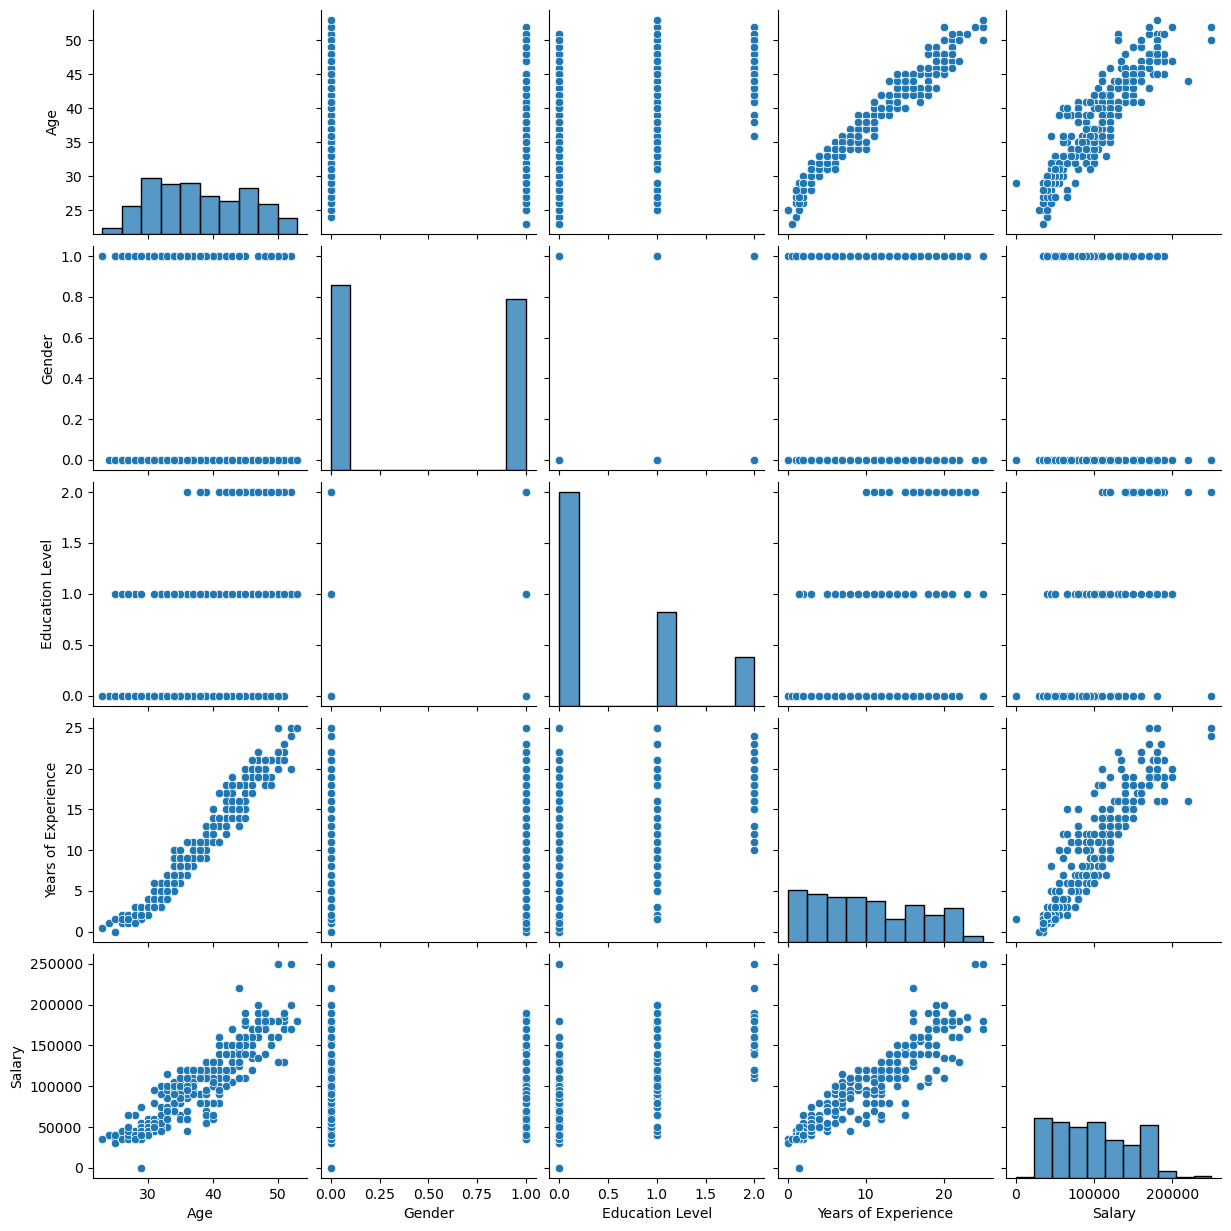

In [15]:
sns.pairplot(sal_data)

<Axes: >

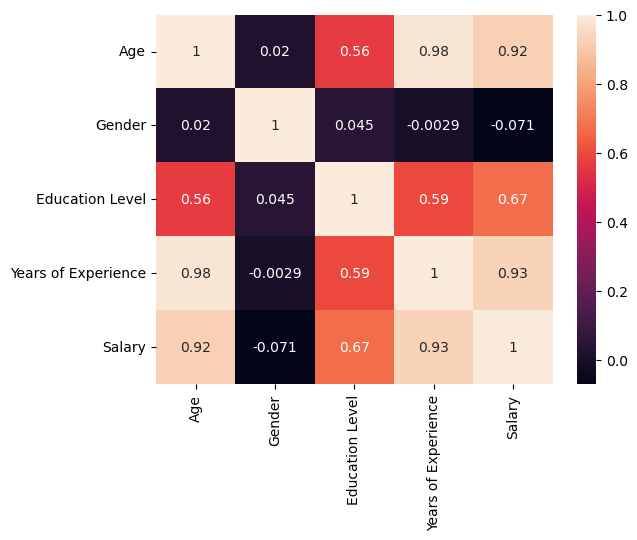

In [16]:
sns.heatmap(sal_data.corr(),annot = True)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_feat,y_feat,train_size=0.8,random_state=1)

#linear model
lr = LinearRegression()
lr_model = lr.fit(x_train,y_train)
lr_prec_val = lr_model.predict(x_test.iloc[:10 , :])
lr_error = lr_model.score(x_test.iloc[:10,:],y_test.iloc[:10])
# print(lr_error)

#polynomial model
pr = PolynomialFeatures(degree = 2)
x_pol_train = pr.fit_transform(x_train)
x_pol_test = pr.transform(x_test)
pr_ = LinearRegression()
pr_model = pr_.fit(x_pol_train,y_train)
pr_prec_val = pr_model.predict(x_pol_test[:10])

# print(pr_prec_val,y_test.iloc[:10])

In [24]:
y_test.iloc[:10]

,Salary
67,45000.0
348,35000.0
343,150000.0
295,60000.0
90,120000.0
298,40000.0
167,150000.0
323,180000.0
65,90000.0
150,45000.0


In [25]:
x_test.iloc[:10 , :]

,Age,Gender,Education Level,Years of Experience
67,31.0,1.0,0.0,5.0
348,28.0,1.0,0.0,1.0
343,41.0,0.0,0.0,14.0
295,33.0,0.0,0.0,4.0
90,36.0,0.0,2.0,11.0
298,30.0,1.0,0.0,2.0
167,46.0,0.0,2.0,18.0
323,47.0,0.0,2.0,20.0
65,38.0,1.0,1.0,10.0
150,29.0,1.0,0.0,3.0


In [30]:
print(x_test.shape)
print(x_pol_test.shape)

lr_error = lr_model.score(x_test.iloc[:10,:],y_test.iloc[:10])
pr_error = pr_model.score(x_pol_test[:10],y_test.iloc[:10])
# error = lr_model.score(prec_val,y_test.iloc[:10])

print(lr_error)
print(pr_error)

(75, 4)
(75, 15)
0.9261723270095791
0.9317380451760237
